In [19]:
import os
import pickle
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from Functions import renormalize, scomplex, plotting, support
from scipy.io import savemat
from scipy.signal import find_peaks
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh

import scipy

import numpy as np
import networkx as nx
import pandas as pd
from Functions import scomplex, plotting, support, renormalize


# Building the C-elegans simplicial complex

In [20]:
#upload the dataset
data_path = '../Data/dimacs10-celegans_metabolic/out.dimacs10-celegans_metabolic'
data_file = open(data_path , 'r')
data = data_file.readlines()

In [21]:
#removing text lines and saving directed edges
c_el = data[4:]
edges = []
N = 1
for line in c_el:
    t = line.strip().split()
    if t[0] != "#":
        origin = int(t[0])
        dest = int(t[1])
        N = max(N, origin, dest)
        edges.append((origin, dest))
data_file.close()

In [22]:
#transforming into undirected
N = N+1
un_edges = sorted(list(set(edges)))

In [23]:
#building the undirected graph
G = nx.Graph()
G.add_nodes_from(list(range(0, N)))
G.add_edges_from(un_edges)
nodes = np.array(list(G.nodes))
edges = np.array(list(G.edges))
cliques = list(nx.enumerate_all_cliques(G))

In [24]:
#clique the graph and build the simplicial complexes
keys = ["nodes", "edges", "faces", "tetrahedra", "4-simplices"]
faces = []
tetrahedra = []
four_simplexes = []
for c in cliques:
    l = len(c)
    if l == 3:
        faces.append(c) #cliquing the triangles
    #elif l == 4:
        #tetrahedra.append(c)
    #elif l == 5:
        #four_simplexes.append(c)

In [25]:
#reshape the graph into sc structure for the renormalization
net = [nodes, edges, faces, tetrahedra, four_simplexes]

sc = {}
sc[keys[0]] = np.reshape(np.arange(0, N), (N, 1))

for i in range(1, 5):
    sc[keys[i]] = np.array(net[i])
for i in range(0, 5):
    sc["n" + str(i)] = sc[keys[i]].shape[0]

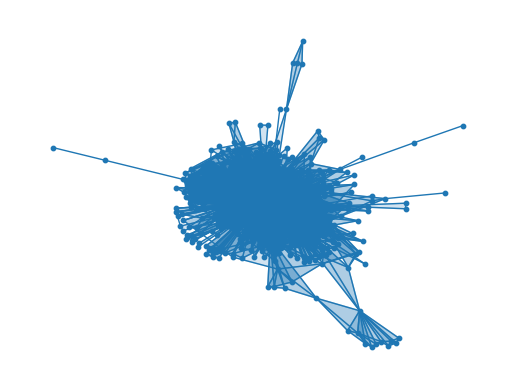

In [26]:
fig,ax = plt.subplots()
plotting.plot_complex(sc,ax,"tab:blue")

# Random renormalization

In [27]:
import os
import pickle
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from Functions import renormalize, scomplex, plotting
from scipy.io import savemat
from scipy.signal import find_peaks
from scipy.sparse.linalg import eigsh
import scipy

In [40]:
rep = 1
d = 1
order = d
n_tau = 50
threshold = 1
METHOD = "representative"
SPARSIFY = False
TRUE_CONNECTIONS = False
pref = "d2_cel_null"

In [41]:
deg_dist = []
sp_dist = []
for r in range(rep):
    rowr = []
    rowr2 = []

    for i in range(d):
        rowi = []
        rowi2 = []
        order = i
        nk = sc["n" + str(order)]
        rho = np.random.rand(nk, nk)
        
        for t in range(n_tau):
            rowt = []
            rowt2 = []
            print(
                "rep: "
                + str(r + 1)
                + "/"
                + str(rep)
                + ", t: "
                + str(t + 1)
                + "/"
                + str(n_tau)
            )
            
            ncut = int(np.floor(t * nk / n_tau))
            
            new_sc, mapnodes, comp, __ = renormalize.renormalize_simplicial_VARIANTS(
                sc,
                order,
                METHOD,
                SPARSIFY,
                TRUE_CONNECTIONS,
                threshold,
                rho = rho,
                nc = ncut
            )
            print(new_sc["n0"])
            new_edge_dict, new_face_dict, new_tet_dict = scomplex.make_dict(new_sc)

            new_deg = scomplex.generalized_degree(
                new_sc, new_edge_dict, new_face_dict, new_tet_dict, d
            )

            B1n, __, __, __, __, __, __ = scomplex.boundary_matrices_3(new_sc)
            L0n = B1n@B1n.T
            Dn = scipy.linalg.eigh(L0n.todense())
            # repetitions x Lk x deg type x tau
            for j in range(d):
                rowt.append(new_deg[j])
                rowt2.append(Dn)
            rowi.append(rowt)
            rowi2.append(rowt2)
        rowr.append(rowi)
        rowr2.append(rowi2)
    deg_dist.append(rowr)
    sp_dist.append(rowr2)

deg_dist = [[list(x) for x in zip(*deg_dist[r])] for r in range(rep)]
sp_dist = [[list(x) for x in zip(*sp_dist[r])] for r in range(rep)]


print(support.list_dim(deg_dist))

path = f"../Tests/C_Elegans"

if not os.path.exists(path):
    os.makedirs(path)

with open(path + "/deg_dist_null.pkl", "wb") as f:
    pickle.dump(deg_dist, f)

with open(path + "/sp_dist_null.pkl", "wb") as f:
    pickle.dump(sp_dist, f)
    

rep: 1/1, t: 1/50
454
rep: 1/1, t: 2/50
445
rep: 1/1, t: 3/50
436
rep: 1/1, t: 4/50
427
rep: 1/1, t: 5/50
418
rep: 1/1, t: 6/50
409
rep: 1/1, t: 7/50
400
rep: 1/1, t: 8/50
391
rep: 1/1, t: 9/50
382
rep: 1/1, t: 10/50
373
rep: 1/1, t: 11/50
364
rep: 1/1, t: 12/50
355
rep: 1/1, t: 13/50
346
rep: 1/1, t: 14/50
336
rep: 1/1, t: 15/50
327
rep: 1/1, t: 16/50
318
rep: 1/1, t: 17/50
309
rep: 1/1, t: 18/50
300
rep: 1/1, t: 19/50
291
rep: 1/1, t: 20/50
282
rep: 1/1, t: 21/50
273
rep: 1/1, t: 22/50
264
rep: 1/1, t: 23/50
255
rep: 1/1, t: 24/50
246
rep: 1/1, t: 25/50
237
rep: 1/1, t: 26/50
227
rep: 1/1, t: 27/50
218
rep: 1/1, t: 28/50
209
rep: 1/1, t: 29/50
200
rep: 1/1, t: 30/50
191
rep: 1/1, t: 31/50
182
rep: 1/1, t: 32/50
173
rep: 1/1, t: 33/50
164
rep: 1/1, t: 34/50
155
rep: 1/1, t: 35/50
146
rep: 1/1, t: 36/50
137
rep: 1/1, t: 37/50
128
rep: 1/1, t: 38/50
119
rep: 1/1, t: 39/50
109
rep: 1/1, t: 40/50
100
rep: 1/1, t: 41/50
91
rep: 1/1, t: 42/50
82
rep: 1/1, t: 43/50
73
rep: 1/1, t: 44/50
64
r

In [33]:
with open(path + "/sp_dist_null.pkl", "wb") as f:
    pickle.dump(sp_dist, f)

# Laplacian Renormalization

In [30]:
rep = 1
d = 1
order = d
n_tau = 50
threshold = 1
METHOD = "representative"
SPARSIFY = False
TRUE_CONNECTIONS = False
pref = "d2_cel_simple"

In [31]:
B1, B2, B3, B4, edge_dict, face_dict, tet_dict = scomplex.boundary_matrices_3(sc)

In [32]:
# Laplacians
L0 = B1 @ (B1.T)
L0 = L0.todense()
D0, U0 = eigh(L0)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:303: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


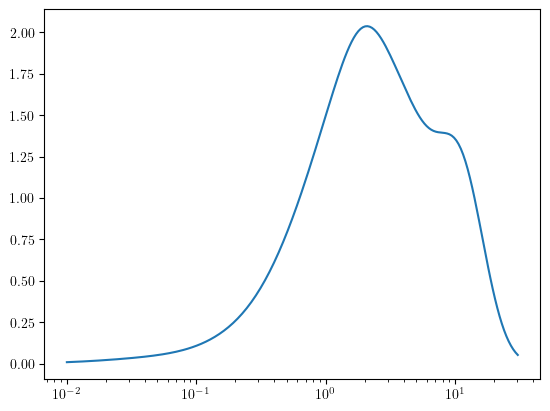

In [34]:
# tau_space0 = np.flip(1/D0)[0::sc["n0"]//n_tau]
[specific_heat, tau_space] = renormalize.compute_heat(D0, -2, 1.5, 200)
plt.semilogx(tau_space,specific_heat)
id, __ = find_peaks(specific_heat)
tau_max0 = tau_space[id[0]]
tau_space0 = np.linspace(0, tau_max0, n_tau)

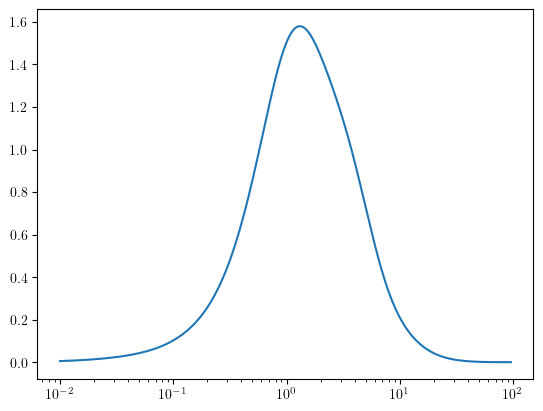

In [35]:
if sc["n1"] != 0:
    L1 = (B1.T) @ B1 + B2 @ (B2.T)
    L1 = L1.todense()
    D1, U1 = eigh(L1)

    [specific_heat, tau_space] = renormalize.compute_heat(D1, -2, 2, 200)
    plt.semilogx(tau_space,specific_heat)
    id, __ = find_peaks(specific_heat)
    if len(id) == 0:
        tau_max1 = 100
    else:
        tau_max1 = tau_space[id[0]] + 7
    tau_space1 = np.linspace(0, tau_max1, n_tau)

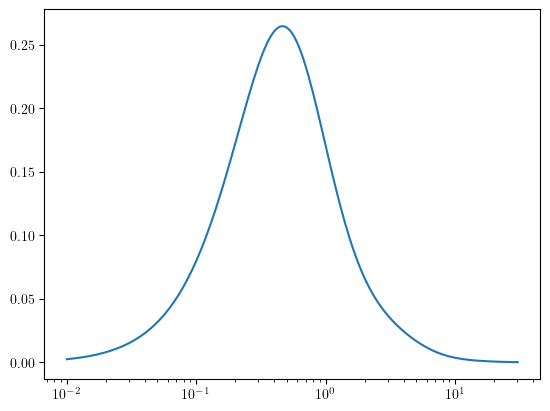

In [36]:
if sc["n2"] != 0:
    L2 = (B2.T) @ B2 + B3 @ (B3.T)
    D2, U2 = eigh(L2.todense())
   
    [specific_heat, tau_space] = renormalize.compute_heat(D2, -2, 1.5, 200)
    plt.semilogx(tau_space,specific_heat)
    id, __ = find_peaks(specific_heat)
    tau_max2 = tau_space[id[0]] + 7
    tau_space2 = np.linspace(0, tau_max2, n_tau)

In [37]:
if sc["n3"] != 0:
    L3 = (B3.T) @ B3 + B4 @ (B4.T)
    L3 = L3.asfptype()
    Na = sc["n3"] - 1
    D3, U3 = eigsh(L3, k=Na, which="SM")
    D3 = np.concatenate((D3, 10000 * np.ones(sc["n3"] - Na)))
    U3 = np.concatenate((U3, np.zeros((sc["n3"], sc["n3"] - Na))), axis=1)

    # tau_space3 = np.flip(1/D3)[0::sc["n3"]//n_tau]
    [specific_heat, tau_space] = renormalize.compute_heat(D3, -2, 1.5, 200)
    id, __ = find_peaks(specific_heat)
    tau_max3 = tau_space[id[0]]
    tau_space3 = np.linspace(0, tau_max3, n_tau)

if sc["n4"] != 0:
    L4 = (B4.T) @ B4
    L4 = L4.asfptype()
    Na = sc["n4"] - 1
    D4, U4 = eigsh(L4, k=Na, which="SM")
    D4 = np.concatenate((D4, 10000 * np.ones(sc["n4"] - Na)))
    U4 = np.concatenate((U4, np.zeros((sc["n4"], sc["n4"] - Na))), axis=1)

    # tau_space4 = np.flip(1/D4)[0::sc["n4"]//n_tau]
    [specific_heat, tau_space] = renormalize.compute_heat(D4, -2, 1.5, 200)
    id, __ = find_peaks(specific_heat)
    tau_max4 = tau_space[id[0]]
    tau_space4 = np.linspace(0, tau_max4, n_tau)

In [48]:
deg_dist =[]
sp_dist = []

rowr = []
rowr2 = []
for t in range(n_tau):
    rowt = []
    rowt2 = []
    print("t: "
        + str(t + 1)
        + "/"
        + str(n_tau)
    )
    for i in range(d):
        rowi = []
        rowi2 = []
        order = i
        if order == 0:
            tau_space = tau_space0
            U = U0
            D = D0
            L = L0
        elif order == 1:
            tau_space = tau_space1
            U = U1
            D = D1
            L = L1
        elif order == 2:
            tau_space = tau_space2
            U = U2
            D = D2
            L = L2
        elif order == 3:
            tau_space = tau_space3
            U = U3
            D = D3
            L = L3
        elif order == 4:
            tau_space = tau_space4
            U = U4
            D = D4
            L = L4
        
        new_sc, mapnodes, comp, __ = renormalize.renormalize_simplicial_VARIANTS(
                sc,
                order,
                L,
                U,
                D,
                tau_space[t],
                METHOD,
                SPARSIFY,
                TRUE_CONNECTIONS,
                threshold,
                simple=True,
            )
        
        print(new_sc["n0"])
        new_edge_dict, new_face_dict, new_tet_dict = scomplex.make_dict(new_sc)

        new_deg = scomplex.generalized_degree(
            new_sc, new_edge_dict, new_face_dict, new_tet_dict, d)
        
        B1n, __, __, __, __, __, __ = scomplex.boundary_matrices_3(new_sc)
        L0n = B1n@B1n.T
        Dn = scipy.linalg.eigh(L0n.todense())
        # repetitions x Lk x deg type x tau
        for j in range(d):
            rowi.append(new_deg[j])
            rowi2.append(Dn)
        rowt.append(rowi)
        rowt2.append(rowi2)
    rowr.append(rowt)
    rowr2.append(rowt2)
deg_dist.append(rowr)
sp_dist.append(rowr2)

t: 1/50
454


/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  ncut = np.sum(D > 1 / np.abs(tau))  # Number of simplices to remove


t: 2/50
454
t: 3/50
313
t: 4/50
189
t: 5/50
173
t: 6/50
146
t: 7/50
132
t: 8/50
121
t: 9/50
96
t: 10/50
86
t: 11/50
75
t: 12/50
52
t: 13/50
45
t: 14/50
40
t: 15/50
33
t: 16/50
23
t: 17/50
15
t: 18/50
12
t: 19/50
12
t: 20/50
12
t: 21/50
10
t: 22/50
8
t: 23/50
7
t: 24/50
7
t: 25/50
6
t: 26/50
5
t: 27/50
3
t: 28/50
3
t: 29/50
2
t: 30/50
3
t: 31/50
4
t: 32/50
5
t: 33/50
6
t: 34/50
6
t: 35/50
5
t: 36/50
5
t: 37/50
6
t: 38/50
6
t: 39/50
6
t: 40/50
6
t: 41/50
6
t: 42/50
6
t: 43/50
6
t: 44/50
6
t: 45/50
8
t: 46/50
7
t: 47/50
6
t: 48/50
7
t: 49/50
6
t: 50/50
6


In [49]:
path = f"../Tests/C_Elegans/"

if not os.path.exists(path):
    os.makedirs(path)

with open(path + "/deg_dist.pkl", "wb") as f:
    pickle.dump(deg_dist, f)
with open(path + "/sp_dist.pkl", "wb") as f:
    pickle.dump(sp_dist, f)
    